# Isophotes
Isophotes are a nice visual way to show the shape of the coma and tail. Because they are not used for science, just one stacked image from one of the days is sufficient. However, it is worthwhile developing a routine to do it automatically for any image, should the need arise.

In [6]:
# Importing packages
import cometToolkit as ctk
import matplotlib.pyplot as plt
import numpy as np

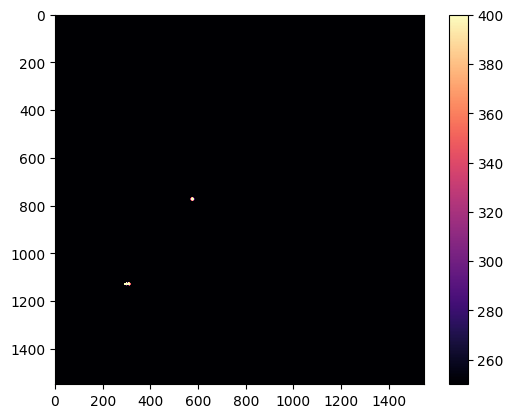

In [7]:
# Loading R image from the first day
image = ctk.GetImage("../DataProducts/StackedImages/Day12/rStacked.fits")
plt.imshow(image, vmin=250, vmax=400, cmap="magma")
plt.colorbar()

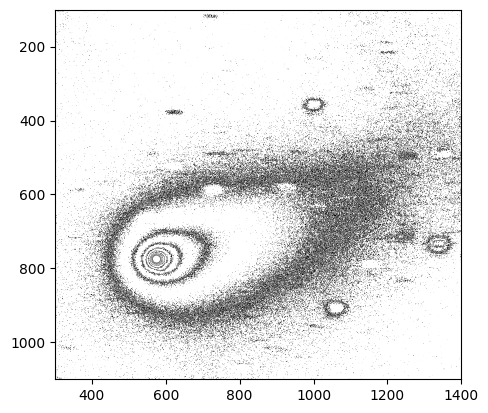

In [16]:
fig, ax = plt.subplots()

ax.contour(image, levels=np.linspace(10, 250, 10), linewidths=0.2, colors="black")
ax.set_xlim(300, 1400)  
ax.set_ylim(1100, 100)
ax.set_aspect("equal")

/tmp/ipykernel_529597/1362631456.py:9: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothImage = scipy.ndimage.filters.gaussian_filter(image, sigma, mode='constant')


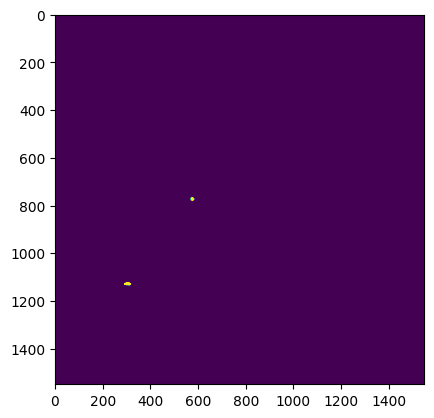

In [17]:
# smoothing
import scipy
import scipy.ndimage

sigma_y = 2.0
sigma_x = 2.0

sigma = [sigma_y, sigma_x]
smoothImage = scipy.ndimage.filters.gaussian_filter(image, sigma, mode='constant')

plt.imshow(smoothImage, vmin=250, vmax=400)

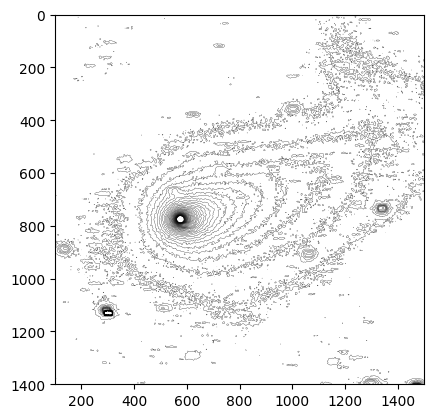

In [24]:
fig, ax = plt.subplots()

ax.contour(smoothImage, levels=np.linspace(2, 200, 50), linewidths=0.2, colors="black")
ax.set_xlim(100, 1500)  
ax.set_ylim(1400, 0)
ax.set_aspect("equal")